In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
df = pd.read_csv("housing.csv")

In [249]:
df.isnull().values.any()

True

In [250]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3205,-119.62,36.35,10.0,3674.0,734.0,1864.0,718.0,2.6145,80300.0,INLAND


In [251]:
df["population"].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

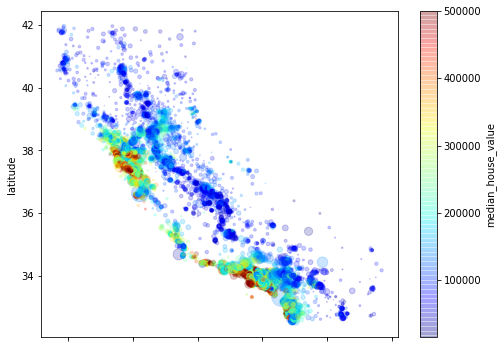

In [252]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize=(8, 6), s=df["population"]/100,
       c="median_house_value", cmap=plt.get_cmap("jet"), alpha=.2)

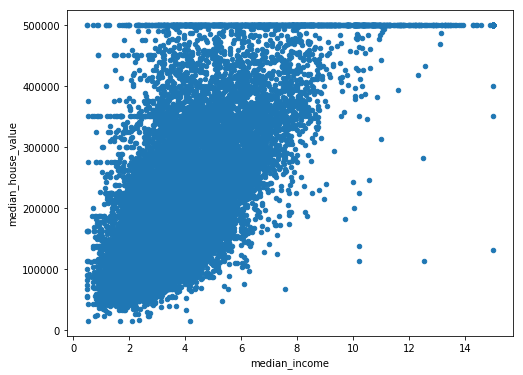

In [253]:
df.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(8,6))

Dropping all the columns with median house value 500000.


In [254]:
#df = df[df["median_house_value"]<490000]

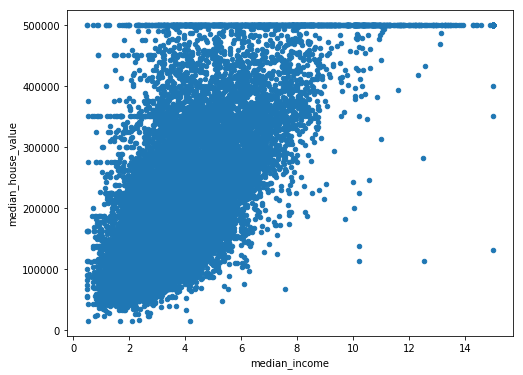

In [255]:
df.plot(kind="scatter", x="median_income", y="median_house_value", figsize=(8,6))

In [256]:
carr = df.corr()
carr["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Since median_income has a direct impact on the median_house_value, let's categorize it well 

In [257]:
df["cat_income"] = np.ceil(df["median_income"]/1.5) 

In [258]:
df["cat_income"].where(df["cat_income"]<5, 5, inplace=True)

In [259]:
df["cat_income"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: cat_income, dtype: int64

In [260]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income
2128,-119.72,36.8,16.0,2396.0,526.0,1338.0,518.0,2.1653,78800.0,INLAND,2.0


In [261]:
df.drop(["longitude", "latitude"], axis=1, inplace=True)

In [262]:
df.sample()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income
422,42.0,2863.0,460.0,1031.0,448.0,6.7138,368600.0,NEAR BAY,5.0


In [263]:
df["total_bedrooms"].isnull().values.any()

True

In [264]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median, inplace=True)

In [265]:
df.isnull().values.any()

False

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null object
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
cat_income            20640 non-null float64
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


In [267]:
df["rooms_per_house"] = df["total_rooms"]/df["households"]
df["population_per_household"] = df["population"]/df["households"]

In [268]:
df.sample()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
12095,12.0,1159.0,209,523.0,159.0,2.7232,123200.0,INLAND,2.0,7.289308,3.289308


In [269]:
df.drop(["total_rooms", "total_bedrooms", "households"], axis=1, inplace=True)

In [270]:
df.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
14656,35.0,1568.0,4.7813,188600.0,NEAR OCEAN,4.0,6.470163,2.835443


In [271]:
df["cat_income"].value_counts()/df.shape[0]

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: cat_income, dtype: float64

In [272]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


In [273]:
for train_index, test_index in split.split(df, df["cat_income"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [274]:
strat_train_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
17887,24.0,3795.0,5.4228,264100.0,<1H OCEAN,4.0,5.391753,3.912371


In [275]:
strat_train_set["cat_income"].value_counts()/strat_train_set.shape[0]

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: cat_income, dtype: float64

In [276]:
strat_test_set["cat_income"].value_counts()/strat_test_set.shape[0]

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: cat_income, dtype: float64

In [277]:
strat_test_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,cat_income,rooms_per_house,population_per_household
18665,23.0,1423.0,2.7375,238000.0,NEAR OCEAN,2.0,4.818318,2.136637


In [278]:
strat_test_set.drop(["cat_income"], axis=1, inplace=True)
strat_train_set.drop(["cat_income"], axis=1, inplace=True)

In [279]:
strat_train_set.sample()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_house,population_per_household
16973,36.0,952.0,4.7917,316000.0,NEAR OCEAN,5.124629,2.824926


In [280]:
strat_train_set=pd.get_dummies(strat_train_set, prefix="ocean_proximity", drop_first=True)
strat_test_set=pd.get_dummies(strat_test_set, prefix="ocean_proximity", drop_first=True)

In [281]:
strat_train_set.sample()


,housing_median_age,population,median_income,median_house_value,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2018,15.0,1383.0,1.0472,57800.0,5.088,3.688,1,0,0,0


In [282]:
strat_test_set.sample()

,housing_median_age,population,median_income,median_house_value,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17847,23.0,2183.0,4.3807,226900.0,4.922137,3.332824,0,0,0,0


In [283]:
y_train = strat_train_set.iloc[:, 3].values
y_test = strat_test_set.iloc[:, 3].values

In [284]:
np.count_nonzero(y_test)

4128

In [285]:
len(y_test)

4128

In [286]:
strat_test_set.drop(["median_house_value"], axis=1, inplace=True)
strat_train_set.drop(["median_house_value"], axis=1, inplace=True)

In [287]:
strat_train_set.sample()

,housing_median_age,population,median_income,rooms_per_house,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12288,27.0,1760.0,3.4545,5.288991,2.691131,1,0,0,0


In [288]:
x_train = strat_train_set.iloc[:,:].values
x_test = strat_test_set.iloc[:,:].values

In [289]:
np.isnan(y_train)

array([False, False, False, ..., False, False, False])

In [290]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [291]:
y_pred = regressor.predict(x_test)

In [292]:
len(y_pred)

4128

In [293]:
len(y_test)

4128

In [297]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_test, y_pred)
np.sqrt(lin_rmse)

71907.40581792331